In [25]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [26]:
# Load the data
file_path = '/Users/niks/Desktop/USDA/Spring 2024/Data/2021_hyperspectral/20210714_FirstDay..txt'
df = pd.read_csv(file_path, delimiter='\t', skiprows=0, header=None)


# Set the DataFrame columns to the first row and then drop the first row
df.columns = df.iloc[0]
df = df.iloc[1:]

#drop duplicate columns

/var/folders/t1/32t4l2vs0rz466xwy0jgvx600000gn/T/ipykernel_24078/3167470610.py:3: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,2

In [27]:
import pandas as pd

# Assuming df is your DataFrame loaded with the data

# Step 1: Find all columns related to Plot 212 and mistakenly labeled Plant 2
plot_212_columns = [col for col in df.columns if 'N212' in col and 'P2' in col]

# Since we know that each plant has 30 readings and it's the last 30 that are mislabeled,
# we identify these columns by their order (assuming they are in the correct order in the DataFrame)
# and rename them to Plant 3.
mislabelled_columns = plot_212_columns[-30:]  # Get the last 30 columns for correction

# Step 2: Rename these columns to reflect Plant 3 instead of Plant 2
corrected_columns = {old_name: old_name.replace('P2', 'P3') for old_name in mislabelled_columns}

# Apply the renaming to the DataFrame
df.rename(columns=corrected_columns, inplace=True)

# Now df should have the corrected column names for Plot 212's Plant 3 readings.


In [28]:


# Reset the DataFrame index
df.reset_index(drop=True, inplace=True)

# Define a function to extract plot IDs
def extract_plot_id(column_name):
    match = re.match(r"N(\d+)P", column_name)
    if match:
        return match.group(1)  # Returns the plot identifier
    else:
        return None

# Initialize a dictionary to hold plot groups
plot_groups = {}

# Iterate over the column names to group them by plot ID
for column in df.columns:
    plot_id = extract_plot_id(column)
    if plot_id:
        if plot_id not in plot_groups:
            plot_groups[plot_id] = [column]
        else:
            plot_groups[plot_id].append(column)

# At this point, plot_groups dictionary contains groups of columns by their plot IDs
print(plot_groups)

# To demonstrate how you might use this, let's print the number of columns associated with each plot ID
for plot_id, columns in plot_groups.items():
    print(f"Plot ID {plot_id} has {len(columns)} columns.")


{'2112': ['N2112P100000.asd', 'N2112P100001.asd', 'N2112P100002.asd', 'N2112P100003.asd', 'N2112P100004.asd', 'N2112P100005.asd', 'N2112P100006.asd', 'N2112P100007.asd', 'N2112P100008.asd', 'N2112P100009.asd', 'N2112P100010.asd', 'N2112P100011.asd', 'N2112P100012.asd', 'N2112P100013.asd', 'N2112P100014.asd', 'N2112P100015.asd', 'N2112P100016.asd', 'N2112P100017.asd', 'N2112P100018.asd', 'N2112P100019.asd', 'N2112P100020.asd', 'N2112P100021.asd', 'N2112P100022.asd', 'N2112P100023.asd', 'N2112P100024.asd', 'N2112P100025.asd', 'N2112P100026.asd', 'N2112P100027.asd', 'N2112P100028.asd', 'N2112P100029.asd', 'N2112P200000.asd', 'N2112P200001.asd', 'N2112P200002.asd', 'N2112P200003.asd', 'N2112P200004.asd', 'N2112P200005.asd', 'N2112P200006.asd', 'N2112P200007.asd', 'N2112P200008.asd', 'N2112P200009.asd', 'N2112P200010.asd', 'N2112P200011.asd', 'N2112P200012.asd', 'N2112P200013.asd', 'N2112P200014.asd', 'N2112P200015.asd', 'N2112P200016.asd', 'N2112P200017.asd', 'N2112P200018.asd', 'N2112P200

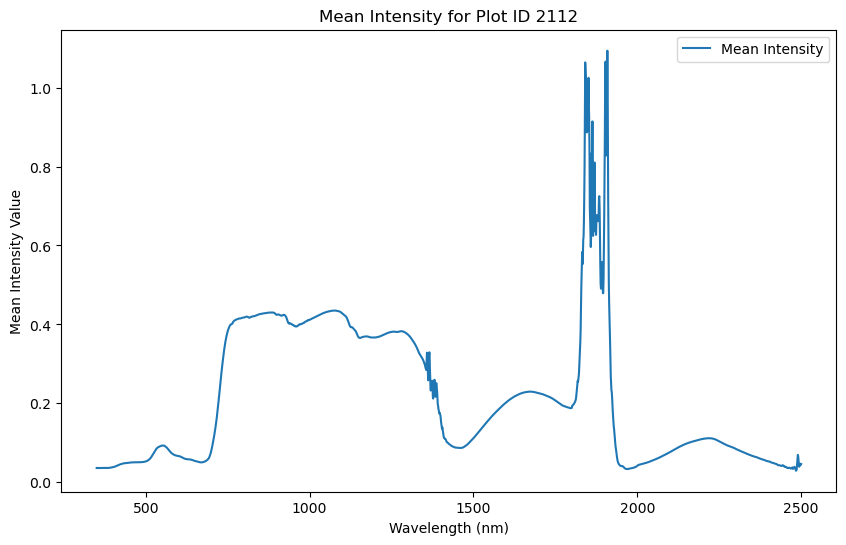

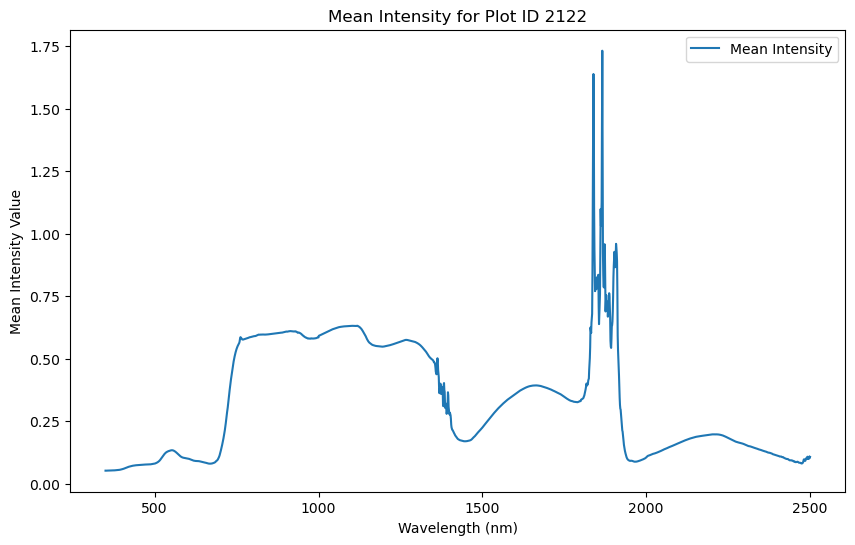

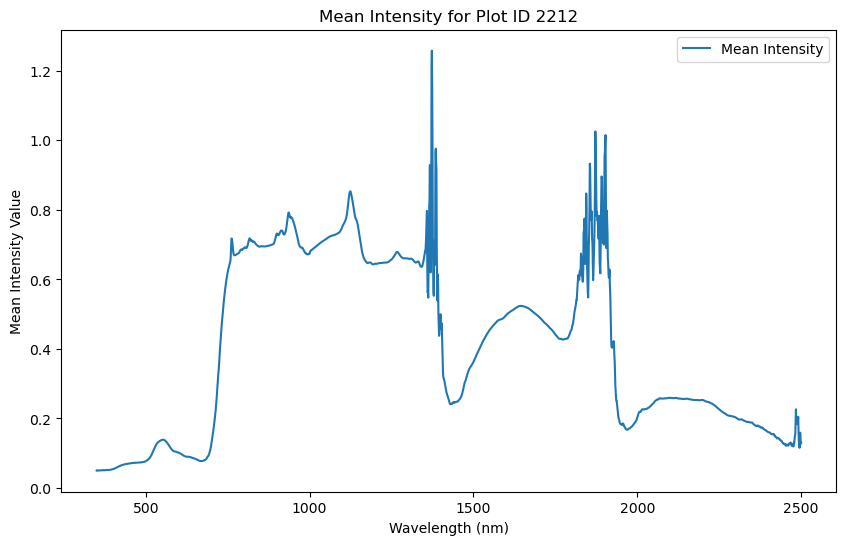

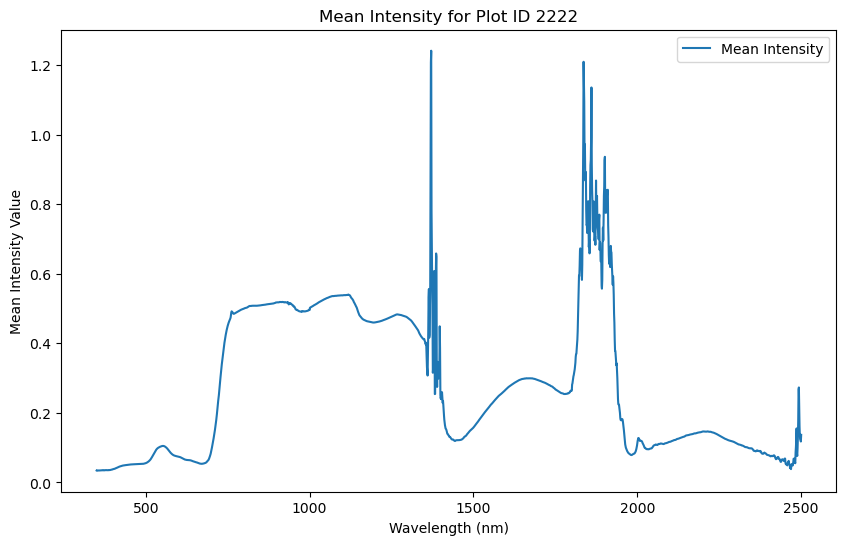

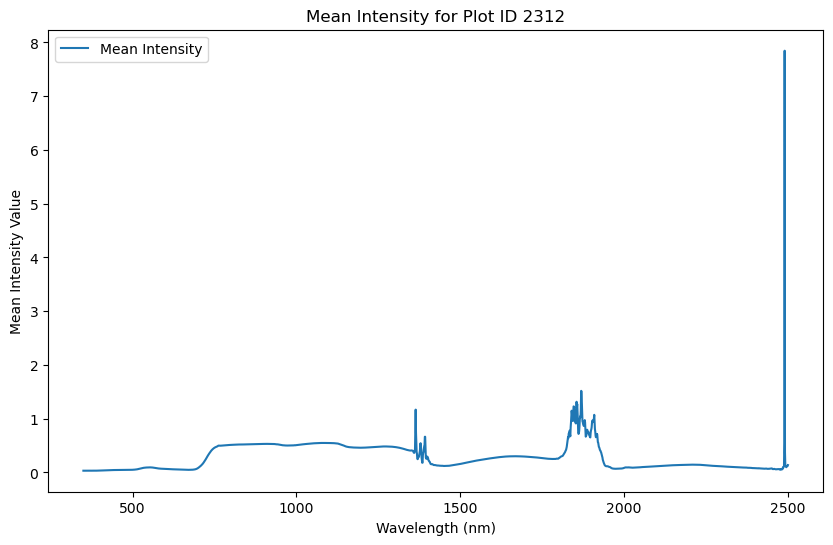

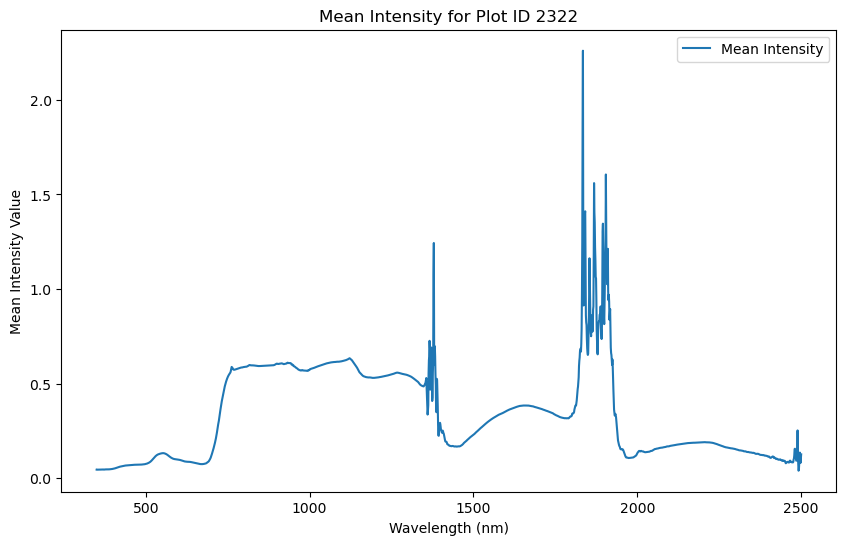

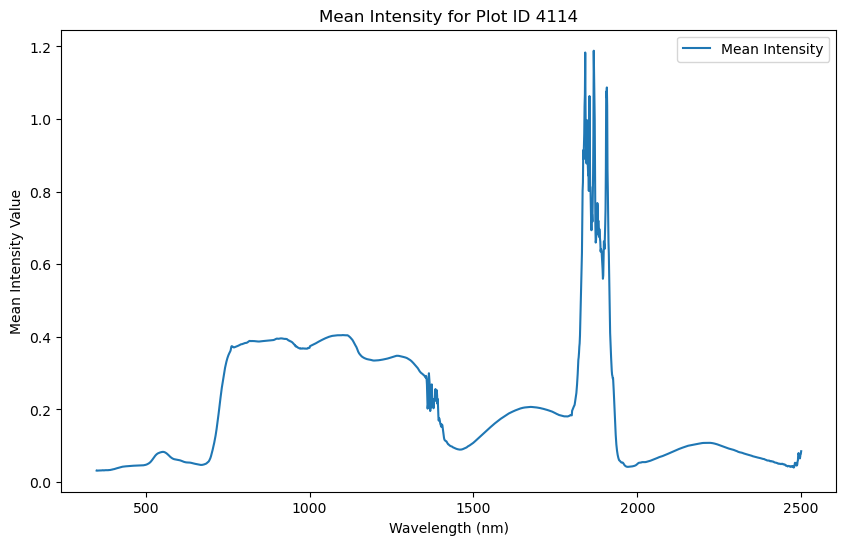

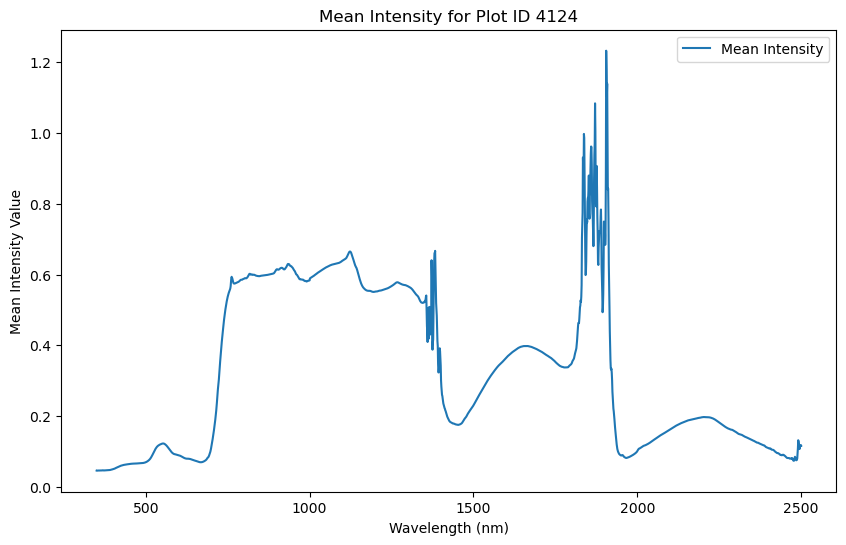

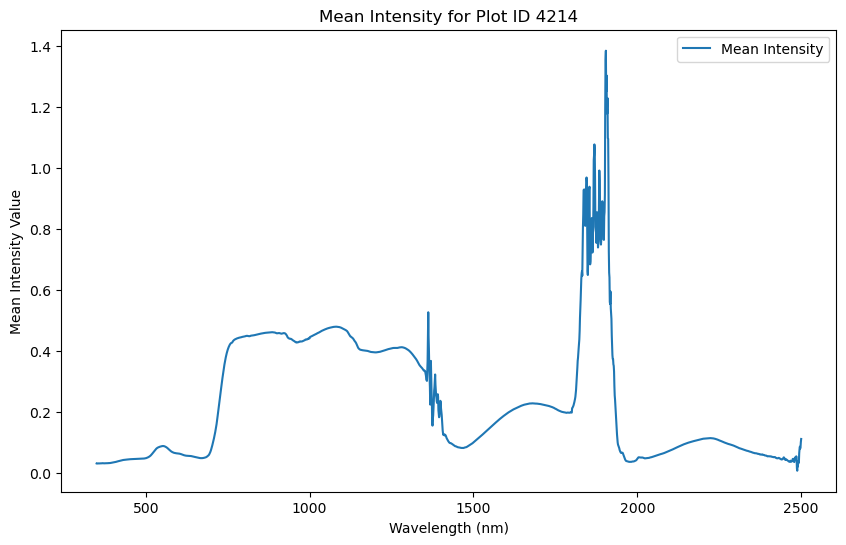

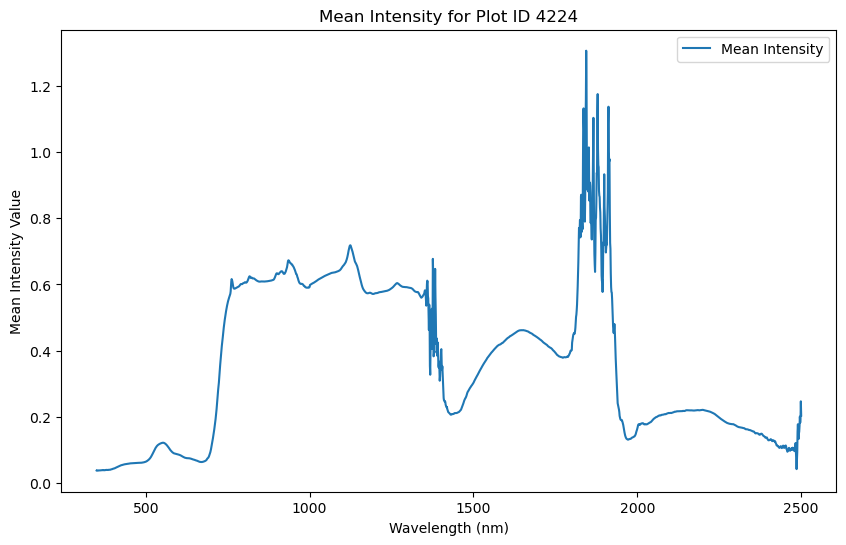

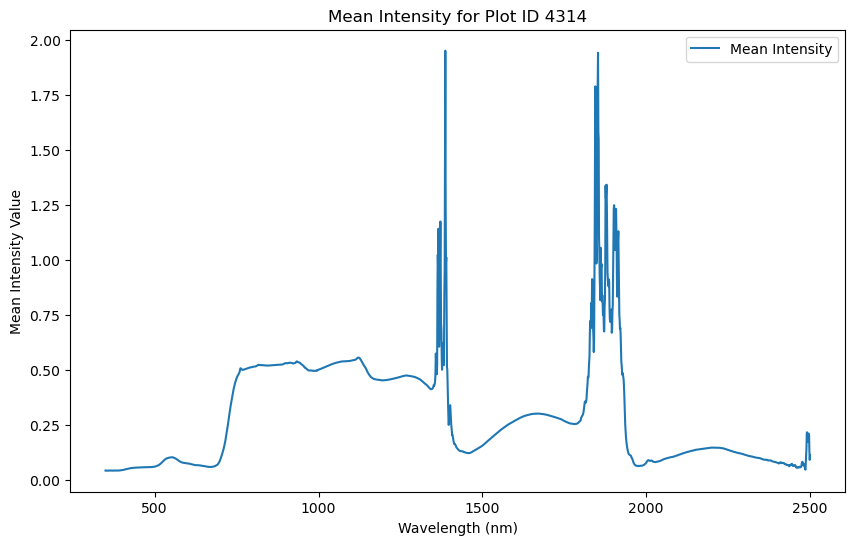

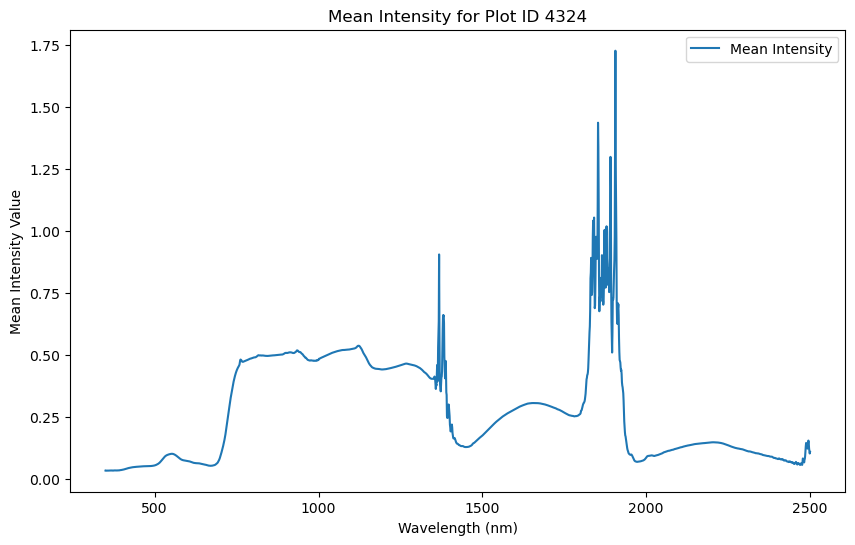

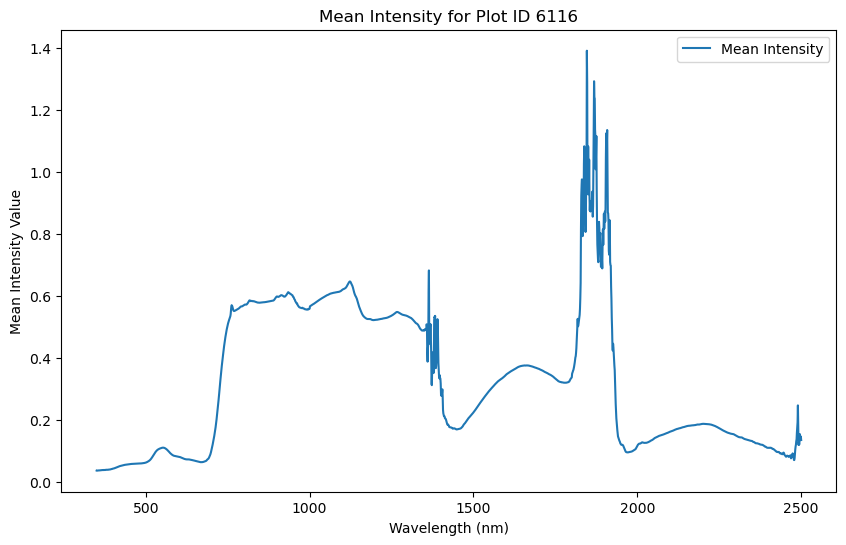

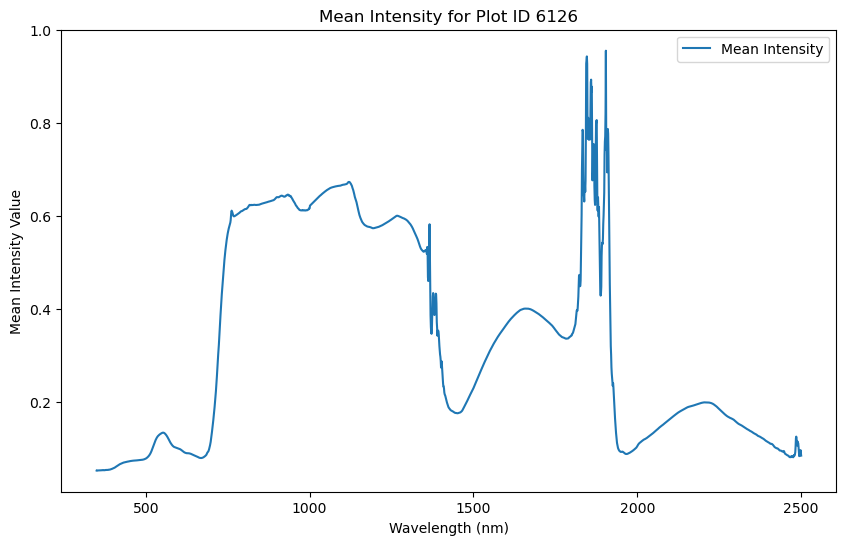

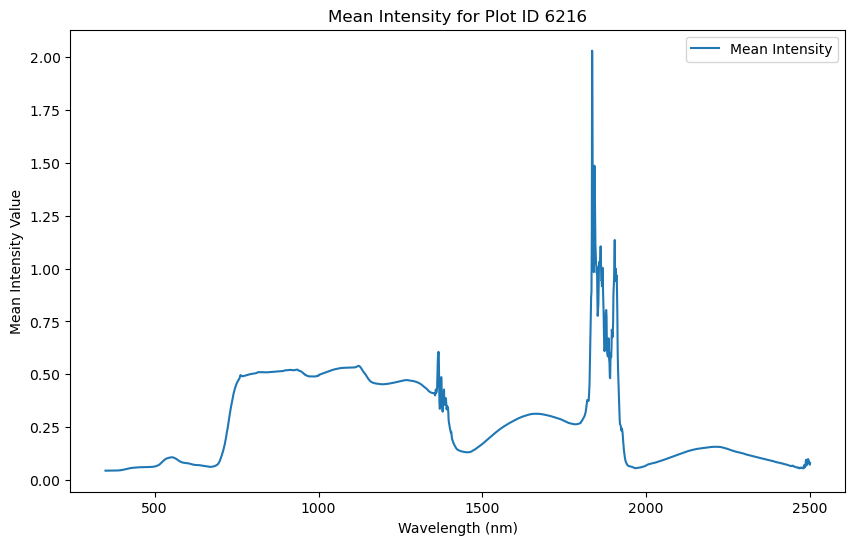

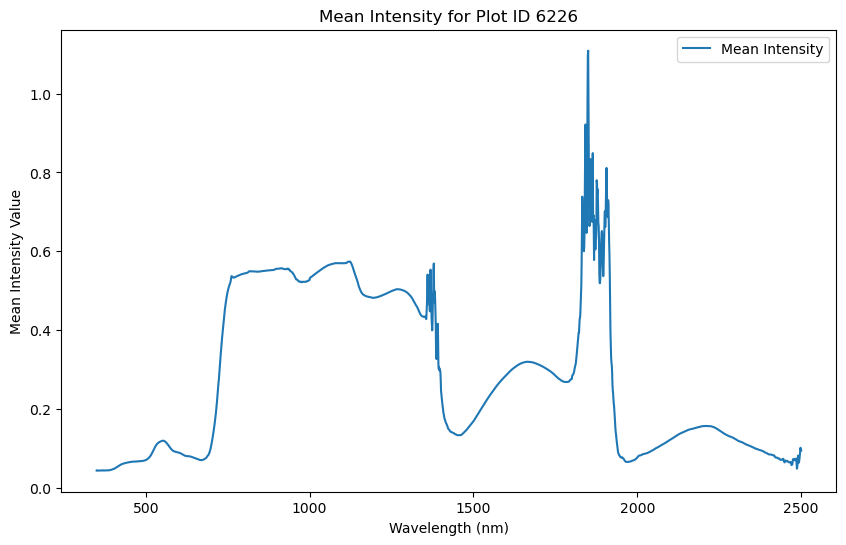

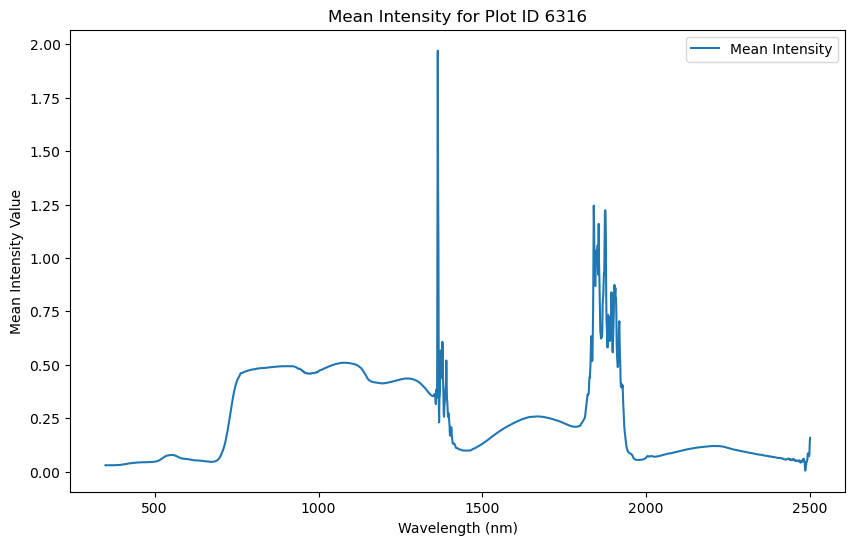

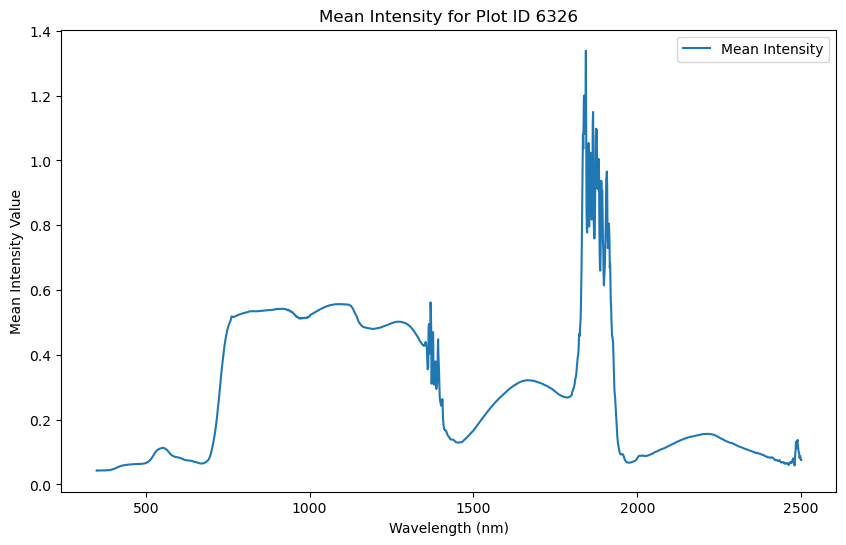

In [29]:
import matplotlib.pyplot as plt

# Ensure the DataFrame is in the correct numeric format
df = df.apply(pd.to_numeric, errors='ignore')

for plot_id, columns in plot_groups.items():
    # Calculate the mean across the columns for this plot ID
    mean_values = df[columns].mean(axis=1)

    # Create a new figure for each plot ID
    plt.figure(figsize=(10, 6))

    # Plot the mean values. If your DataFrame includes a 'Wavelength' column, use it as the x-axis.
    if 'Wavelength' in df.columns:
        plt.plot(df['Wavelength'], mean_values, label=f'Mean Intensity')
        plt.xlabel('Wavelength (nm)')
    else:
        plt.plot(mean_values, label=f'Plot ID {plot_id}')
        plt.xlabel('Sample Index')
    
    plt.ylabel('Mean Intensity Value')
    plt.title(f'Mean Intensity for Plot ID {plot_id}')
    plt.legend()
    plt.show()


In [30]:
import numpy as np

#for groups in filtered_plot_groups, add label to each group
df['Plot Number'] = np.nan
group_to_plot_number = {}


# Manually enter the data based on the visual inspection of the image
group_to_plot_number['4114'] = 1
group_to_plot_number['1111'] = 2
group_to_plot_number['5115'] = 3
group_to_plot_number['3113'] = 4
group_to_plot_number['2112'] = 5
group_to_plot_number['6116'] = 6
group_to_plot_number['3123'] = 7
group_to_plot_number['1121'] = 8
group_to_plot_number['6126'] = 9
group_to_plot_number['5125'] = 10
group_to_plot_number['4124'] = 11
group_to_plot_number['2122'] = 12
group_to_plot_number['6226'] = 13
group_to_plot_number['1221'] = 14
group_to_plot_number['5225'] = 15
group_to_plot_number['4224'] = 16
group_to_plot_number['3223'] = 17
group_to_plot_number['2222'] = 18
group_to_plot_number['4214'] = 19
group_to_plot_number['5215'] = 20
group_to_plot_number['3213'] = 21
group_to_plot_number['6216'] = 22
group_to_plot_number['1211'] = 23
group_to_plot_number['2212'] = 24
group_to_plot_number['3323'] = 25
group_to_plot_number['6326'] = 26
group_to_plot_number['4324'] = 27
group_to_plot_number['5325'] = 28
group_to_plot_number['2322'] = 29
group_to_plot_number['1321'] = 30
group_to_plot_number['4314'] = 31
group_to_plot_number['1311'] = 32
group_to_plot_number['2312'] = 33
group_to_plot_number['3313'] = 34
group_to_plot_number['6316'] = 35
group_to_plot_number['5315'] = 36

group_to_plot_number

{'4114': 1,
 '1111': 2,
 '5115': 3,
 '3113': 4,
 '2112': 5,
 '6116': 6,
 '3123': 7,
 '1121': 8,
 '6126': 9,
 '5125': 10,
 '4124': 11,
 '2122': 12,
 '6226': 13,
 '1221': 14,
 '5225': 15,
 '4224': 16,
 '3223': 17,
 '2222': 18,
 '4214': 19,
 '5215': 20,
 '3213': 21,
 '6216': 22,
 '1211': 23,
 '2212': 24,
 '3323': 25,
 '6326': 26,
 '4324': 27,
 '5325': 28,
 '2322': 29,
 '1321': 30,
 '4314': 31,
 '1311': 32,
 '2312': 33,
 '3313': 34,
 '6316': 35,
 '5315': 36}

In [31]:
# Convert data to numeric, ignoring errors for non-numeric data
df = df.apply(pd.to_numeric, errors='ignore')

# Find the index for the row corresponding to 770 nm wavelength
wavelength_770_index = df[df['Wavelength'] == 770].index[0]

# Dictionary to keep track of how many columns are filtered out per group
filtered_columns_count = {}

# New dictionary for filtered plot groups
filtered_plot_groups = {}

for plot_id, columns in plot_groups.items():
    # Filter columns based on intensity value at 770 nm
    filtered_columns = [col for col in columns if df.at[wavelength_770_index, col] >= 0.3]
    
    # Note how many columns are filtered out
    filtered_columns_count[plot_id] = len(columns) - len(filtered_columns)
    
    # Update the plot groups with filtered columns
    filtered_plot_groups[plot_id] = filtered_columns

# Print out the count of filtered columns per plot group
for plot_id, count in filtered_columns_count.items():
    print(f"Plot ID {plot_id}: {count} columns filtered out.")




Plot ID 2112: 17 columns filtered out.
Plot ID 2122: 0 columns filtered out.
Plot ID 2212: 0 columns filtered out.
Plot ID 2222: 1 columns filtered out.
Plot ID 2312: 0 columns filtered out.
Plot ID 2322: 0 columns filtered out.
Plot ID 4114: 20 columns filtered out.
Plot ID 4124: 0 columns filtered out.
Plot ID 4214: 3 columns filtered out.
Plot ID 4224: 0 columns filtered out.
Plot ID 4314: 0 columns filtered out.
Plot ID 4324: 5 columns filtered out.
Plot ID 6116: 0 columns filtered out.
Plot ID 6126: 0 columns filtered out.
Plot ID 6216: 2 columns filtered out.
Plot ID 6226: 0 columns filtered out.
Plot ID 6316: 0 columns filtered out.
Plot ID 6326: 0 columns filtered out.


In [32]:
import pandas as pd

def calculate_vegetation_indices(df, plot_groups):
    # Helper function to calculate NDVI
    def calculate_ndvi(nir, red):
        return (nir - red) / (nir + red)
    
    def calculate_repi3(r670, r780, r700, r740):
        return 700 + 40 * (((r670 + r780) / 2) - r700) / (r740 - r700)

    def calculate_repi4(r665, r783, r705, r740):
        return 705 + 35 * (((r665 + r783) / 2) - r705) / (r740 - r705)

    
    # Initialize a dictionary to store the mean VI values for each group
    mean_vis_by_group = {}

    wavelength_indices = {
        '860': df.index[df['Wavelength'] == 860].tolist()[0],
        '650': df.index[df['Wavelength'] == 650].tolist()[0],
        '800': df.index[df['Wavelength'] == 800].tolist()[0],
        '670': df.index[df['Wavelength'] == 670].tolist()[0],
        '470': df.index[df['Wavelength'] == 470].tolist()[0],
        '750': df.index[df['Wavelength'] == 750].tolist()[0],
        '705': df.index[df['Wavelength'] == 705].tolist()[0],
        '720': df.index[df['Wavelength'] == 720].tolist()[0],
        '734': df.index[df['Wavelength'] == 734].tolist()[0],
        '747': df.index[df['Wavelength'] == 747].tolist()[0],
        '715': df.index[df['Wavelength'] == 715].tolist()[0],
        '726': df.index[df['Wavelength'] == 726].tolist()[0],
        '531': df.index[df['Wavelength'] == 531].tolist()[0],
        '570': df.index[df['Wavelength'] == 570].tolist()[0],
        '445': df.index[df['Wavelength'] == 445].tolist()[0],
        '680': df.index[df['Wavelength'] == 680].tolist()[0],
        '500': df.index[df['Wavelength'] == 500].tolist()[0],
        '510': df.index[df['Wavelength'] == 510].tolist()[0],
        '550': df.index[df['Wavelength'] == 550].tolist()[0],
        '900': df.index[df['Wavelength'] == 900].tolist()[0],
        '970': df.index[df['Wavelength'] == 970].tolist()[0],
        '783': df.index[df['Wavelength'] == 783].tolist()[0],
        '560': df.index[df['Wavelength'] == 560].tolist()[0],
        '740': df.index[df['Wavelength'] == 740].tolist()[0],
        '700': df.index[df['Wavelength'] == 700].tolist()[0],
        '780': df.index[df['Wavelength'] == 780].tolist()[0],
        '665': df.index[df['Wavelength'] == 665].tolist()[0],
        '721': df.index[df['Wavelength'] == 721].tolist()[0],
        '719': df.index[df['Wavelength'] == 719].tolist()[0],
        '677': df.index[df['Wavelength'] == 677].tolist()[0],
        '675': df.index[df['Wavelength'] == 675].tolist()[0],
        '706': df.index[df['Wavelength'] == 706].tolist()[0],
        '704': df.index[df['Wavelength'] == 704].tolist()[0],
        '763': df.index[df['Wavelength'] == 763].tolist()[0],
        '761': df.index[df['Wavelength'] == 761].tolist()[0],
        '720': df.index[df['Wavelength'] == 720].tolist()[0],
        '718': df.index[df['Wavelength'] == 718].tolist()[0],
        '691': df.index[df['Wavelength'] == 691].tolist()[0],
        '689': df.index[df['Wavelength'] == 689].tolist()[0],
        '741': df.index[df['Wavelength'] == 741].tolist()[0],
        '739': df.index[df['Wavelength'] == 739].tolist()[0],
        '509': df.index[df['Wavelength'] == 509].tolist()[0],
        '508': df.index[df['Wavelength'] == 508].tolist()[0],
        '537': df.index[df['Wavelength'] == 537].tolist()[0],
        '535': df.index[df['Wavelength'] == 535].tolist()[0],
        '850': df.index[df['Wavelength'] == 850].tolist()[0],
        '1650': df.index[df['Wavelength'] == 1650].tolist()[0],
        '858': df.index[df['Wavelength'] == 858].tolist()[0],
        '2130': df.index[df['Wavelength'] == 2130].tolist()[0],
        '860': df.index[df['Wavelength'] == 860].tolist()[0],
        '2140': df.index[df['Wavelength'] == 2140].tolist()[0],
        '900': df.index[df['Wavelength'] == 900].tolist()[0],
        '970': df.index[df['Wavelength'] == 970].tolist()[0],
        '858': df.index[df['Wavelength'] == 858].tolist()[0],
        '1240': df.index[df['Wavelength'] == 1240].tolist()[0],
        '1600': df.index[df['Wavelength'] == 1600].tolist()[0],
        '820': df.index[df['Wavelength'] == 820].tolist()[0],
        '1640': df.index[df['Wavelength'] == 1640].tolist()[0]
    }
    # Add indices for other VIs as needed

    # Initialize a dictionary to store the mean VI values for each group
    mean_vis_by_group = {}

    for plot_id, columns in plot_groups.items():
        # Initialize a dictionary to store individual VI calculations
        vis = { 'NDVI': [], 'EVI': [], 'RENDVI': [], 'MRENDVI': [], 'VREI1': [], 'VREI2': [], 'PRI': [],
                'SIPI': [], 'PSRI': [], 'CRI1': [], 'CRI2': [], 'WBI': [], 'MCARI': [], 'MTVI': [], 
                'TCARI': [], 'GNDVI': [], 'NDCI1': [], 'NDCI2': [], 'REPI3': [],
                'REPI4': [], 'REPI2': [], 'D720': [], 'EGFR': [], 'NDII': [], 'NDWI2130': [], 'NDWI2140': [], 'WI': [], 'SRWI1': [], 'MSI': [], 'SWISWI': []}

        # Calculate each VI for this group
        for col in columns:
            # NDVI
            nir = df.at[wavelength_indices['860'], col]
            red = df.at[wavelength_indices['650'], col]
            vis['NDVI'].append(calculate_ndvi(nir, red))
            
            # EVI
            evi = 2.5 * (df.at[wavelength_indices['800'], col] - df.at[wavelength_indices['670'], col]) / \
                  (df.at[wavelength_indices['800'], col] + 6 * df.at[wavelength_indices['670'], col] - 7.5 * df.at[wavelength_indices['470'], col] + 1)
            vis['EVI'].append(evi)
            
            # Add calculations for other VIs in a similar manner
            # Example for RENDVI
            rendvi = (df.at[wavelength_indices['750'], col] - df.at[wavelength_indices['705'], col]) / \
                     (df.at[wavelength_indices['750'], col] + df.at[wavelength_indices['705'], col])
            (df.at[wavelength_indices['750'], col] + df.at[wavelength_indices['705'], col])
            vis['RENDVI'].append(rendvi)

            # Calculate other VIs
            mrendvi = (df.at[wavelength_indices['750'], col] - df.at[wavelength_indices['705'], col]) / \
                    (df.at[wavelength_indices['750'], col] + df.at[wavelength_indices['705'], col] - 2 * df.at[wavelength_indices['445'], col])
            vis['MRENDVI'].append(mrendvi)



            vrei1 = df.at[wavelength_indices['740'], col] / df.at[wavelength_indices['720'], col]
            vis['VREI1'].append(vrei1)

            vrei2 = (df.at[wavelength_indices['734'], col] - df.at[wavelength_indices['747'], col]) / \
                    (df.at[wavelength_indices['715'], col] + df.at[wavelength_indices['726'], col])
            vis['VREI2'].append(vrei2)

            pri = (df.at[wavelength_indices['531'], col] - df.at[wavelength_indices['570'], col]) / \
                (df.at[wavelength_indices['531'], col] + df.at[wavelength_indices['570'], col])
            vis['PRI'].append(pri)

            sipi = (df.at[wavelength_indices['800'], col] - df.at[wavelength_indices['445'], col]) / \
                (df.at[wavelength_indices['800'], col] - df.at[wavelength_indices['680'], col])
            vis['SIPI'].append(sipi)

            psri = (df.at[wavelength_indices['680'], col] - df.at[wavelength_indices['500'], col]) / \
                df.at[wavelength_indices['750'], col]
            vis['PSRI'].append(psri)

            cri1 = (1 / df.at[wavelength_indices['510'], col]) - (1 / df.at[wavelength_indices['550'], col])
            vis['CRI1'].append(cri1)

            cri2 = (1 / df.at[wavelength_indices['510'], col]) - (1 / df.at[wavelength_indices['700'], col])
            vis['CRI2'].append(cri2)

            wbi = df.at[wavelength_indices['900'], col] / df.at[wavelength_indices['970'], col]
            vis['WBI'].append(wbi)

            mcari = ((df.at[wavelength_indices['750'], col] - df.at[wavelength_indices['705'], col]) - 0.2 * \
                    (df.at[wavelength_indices['750'], col] - df.at[wavelength_indices['550'], col]) * \
                    (df.at[wavelength_indices['750'], col] / df.at[wavelength_indices['705'], col])) / \
                    (df.at[wavelength_indices['750'], col] / df.at[wavelength_indices['705'], col])
            vis['MCARI'].append(mcari)

            mtvi = 1.2 * (1.2 * (df.at[wavelength_indices['800'], col] - df.at[wavelength_indices['550'], col]) - \
                        2.5 * (df.at[wavelength_indices['670'], col] - df.at[wavelength_indices['550'], col]))
            vis['MTVI'].append(mtvi)

            tcari = 3 * ((df.at[wavelength_indices['750'], col] - df.at[wavelength_indices['705'], col]) - 0.2 * \
                        (df.at[wavelength_indices['750'], col] - df.at[wavelength_indices['550'], col]) * \
                        (df.at[wavelength_indices['750'], col] / df.at[wavelength_indices['705'], col]))
            vis['TCARI'].append(tcari)

            gndvi = (df.at[wavelength_indices['800'], col] - df.at[wavelength_indices['550'], col]) / \
                    (df.at[wavelength_indices['800'], col] + df.at[wavelength_indices['550'], col])
            vis['GNDVI'].append(gndvi)

            ndci1 = (df.at[wavelength_indices['783'], col] - df.at[wavelength_indices['705'], col]) / \
                    (df.at[wavelength_indices['783'], col] + df.at[wavelength_indices['705'], col])
            vis['NDCI1'].append(ndci1)

            ndci2 = (df.at[wavelength_indices['783'], col] - df.at[wavelength_indices['560'], col]) / \
                    (df.at[wavelength_indices['783'], col] + df.at[wavelength_indices['560'], col])
            vis['NDCI2'].append(ndci2)

            r670 = df.at[wavelength_indices['670'], col]
            r780 = df.at[wavelength_indices['780'], col]
            r700 = df.at[wavelength_indices['700'], col]
            r740 = df.at[wavelength_indices['740'], col]
            repi3 = calculate_repi3(r670, r780, r700, r740)
            vis['REPI3'].append(repi3)

            # Calculate REPI4
            r665 = df.at[wavelength_indices['665'], col]
            r783 = df.at[wavelength_indices['783'], col]
            r705 = df.at[wavelength_indices['705'], col]
            repi4 = calculate_repi4(r665, r783, r705, r740)
            vis['REPI4'].append(repi4)

            D720 = (df.at[wavelength_indices['721'], col] - df.at[wavelength_indices['719'], col]) / 2
            vis['D720'].append(D720)

            # Calculate spectral derivatives using central differences
            D676 = (df.at[wavelength_indices['677'], col] - df.at[wavelength_indices['675'], col]) / 2
            D705 = (df.at[wavelength_indices['706'], col] - df.at[wavelength_indices['704'], col]) / 2
            D762 = (df.at[wavelength_indices['763'], col] - df.at[wavelength_indices['761'], col]) / 2
            D719 = (df.at[wavelength_indices['720'], col] - df.at[wavelength_indices['718'], col]) / 2

            # Substitute the spectral derivatives into the REPI2 formula
            REPI2 = ((705 * (D676 - D705)) / (676 - 705) - D705) * (((762 * (D719 - D762)) / (719 - 762)) - D762) / ((D676 - D705) / (676 - 705) * (D719 - D762) / (719 - 762))

            # Add the REPI2 calculation to your list of indices
            vis['REPI2'].append(REPI2)

            # Calculate spectral derivatives using central differences
            D690 = (df.at[wavelength_indices['691'], col] - df.at[wavelength_indices['689'], col]) / 2
            D740 = (df.at[wavelength_indices['741'], col] - df.at[wavelength_indices['739'], col]) / 2
            D509 = (df.at[wavelength_indices['510'], col] - df.at[wavelength_indices['508'], col]) / 2
            D536 = (df.at[wavelength_indices['537'], col] - df.at[wavelength_indices['535'], col]) / 2

            # Calculate EGFR
            EGFR = max(D690, D740) / max(D509, D536)

            # Add the EGFR calculation to your list of indices
            vis['EGFR'].append(EGFR)

            #Calculate NDII
            NDII = (df.at[wavelength_indices['850'], col] - df.at[wavelength_indices['1650'], col]) / \
                    (df.at[wavelength_indices['850'], col] + df.at[wavelength_indices['1650'], col])
            vis['NDII'].append(NDII)

            NDWI2130 = (df.at[wavelength_indices['858'], col] - df.at[wavelength_indices['2130'], col]) / \
                    (df.at[wavelength_indices['858'], col] + df.at[wavelength_indices['2130'], col])
            vis['NDWI2130'].append(NDWI2130)
            NDWI2140 = (df.at[wavelength_indices['860'], col] - df.at[wavelength_indices['2140'], col]) / \
                    (df.at[wavelength_indices['860'], col] + df.at[wavelength_indices['2140'], col])    
            vis['NDWI2140'].append(NDWI2140)
            WI = (df.at[wavelength_indices['900'], col] / \
                   df.at[wavelength_indices['970'], col])
            vis['WI'].append(WI)
            SRWI1 = (df.at[wavelength_indices['858'], col] / \
                     df.at[wavelength_indices['1240'], col])
            vis['SRWI1'].append(SRWI1)
            MSI = (df.at[wavelength_indices['1600'], col] / \
                   df.at[wavelength_indices['820'], col])
            vis['MSI'].append(MSI)
            SWISWI = (df.at[wavelength_indices['858'], col] - df.at[wavelength_indices['1640'],col]) / \
                      (df.at[wavelength_indices['858'], col] + df.at[wavelength_indices['1640'], col])
            vis['SWISWI'].append(SWISWI)





            # Convert VI lists to DataFrame to facilitate mean calculation
        vi_df = pd.DataFrame(vis)

        # Calculate mean VI values for the group and add to the main dictionary
        mean_vis_by_group[plot_id] = vi_df.mean()

    return mean_vis_by_group

# Example usage (make sure df and filtered_plot_groups are defined correctly):
mean_vi_values = calculate_vegetation_indices(df, filtered_plot_groups)
print(mean_vi_values)

{'2112': NDVI             0.776296
EVI              0.717299
RENDVI           0.584369
MRENDVI          0.735853
VREI1            1.794483
VREI2           -0.185629
PRI              0.008886
SIPI             1.007086
PSRI            -0.001979
CRI1             6.635770
CRI2             4.860217
WBI              1.060479
MCARI            0.017266
MTVI             0.641965
TCARI            0.189997
GNDVI            0.633369
NDCI1            0.609716
NDCI2            0.639221
REPI3          723.281339
REPI4          724.211785
REPI2       514126.367399
D720             0.008472
EGFR             8.333588
NDII             0.311380
NDWI2130         0.657355
NDWI2140         0.644183
WI               1.060479
SRWI1            1.131858
MSI              0.478557
SWISWI           0.318985
dtype: float64, '2122': NDVI             0.759543
EVI              0.849145
RENDVI           0.573757
MRENDVI          0.722351
VREI1            1.763918
VREI2           -0.179789
PRI              0.001765
SIPI 

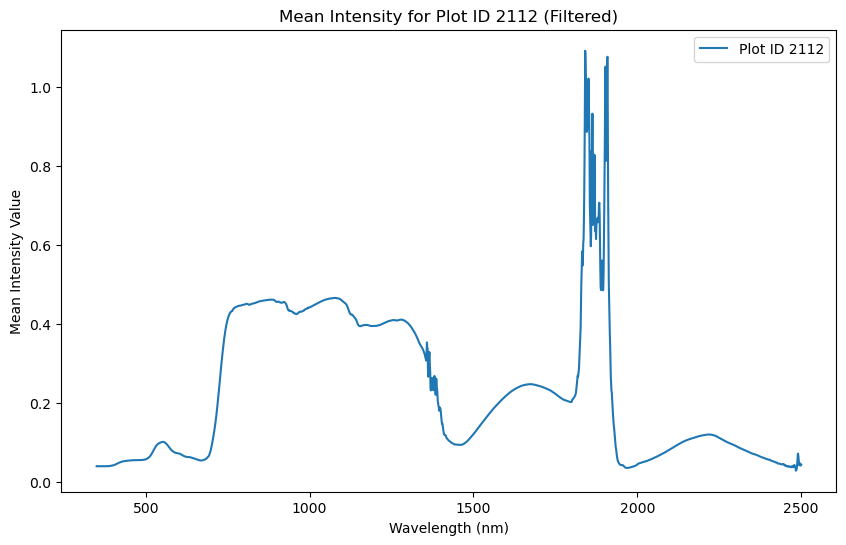

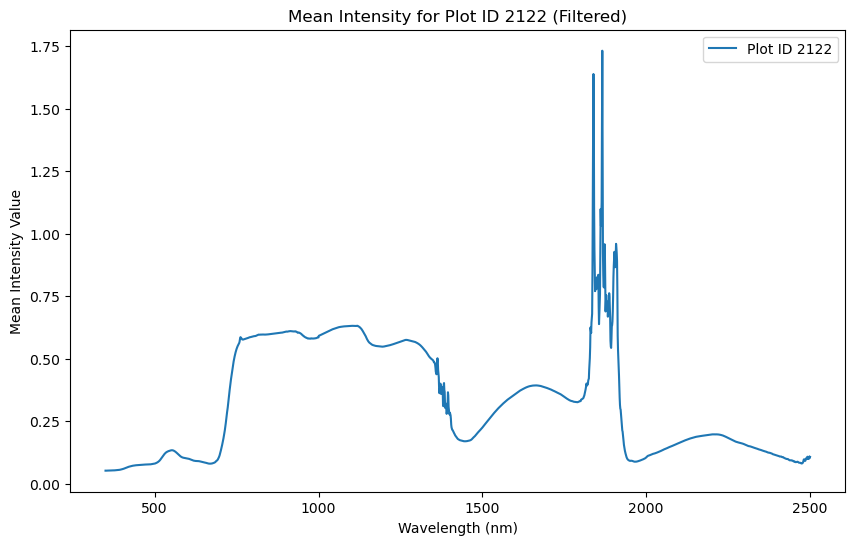

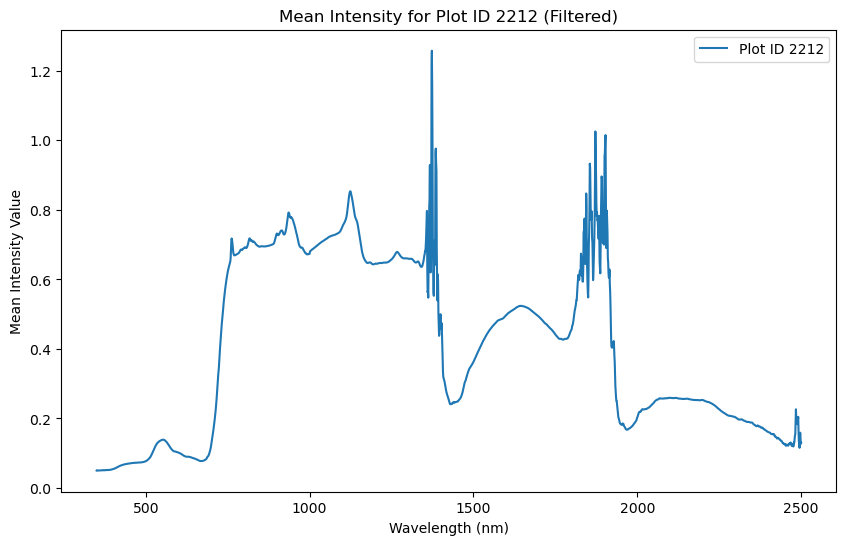

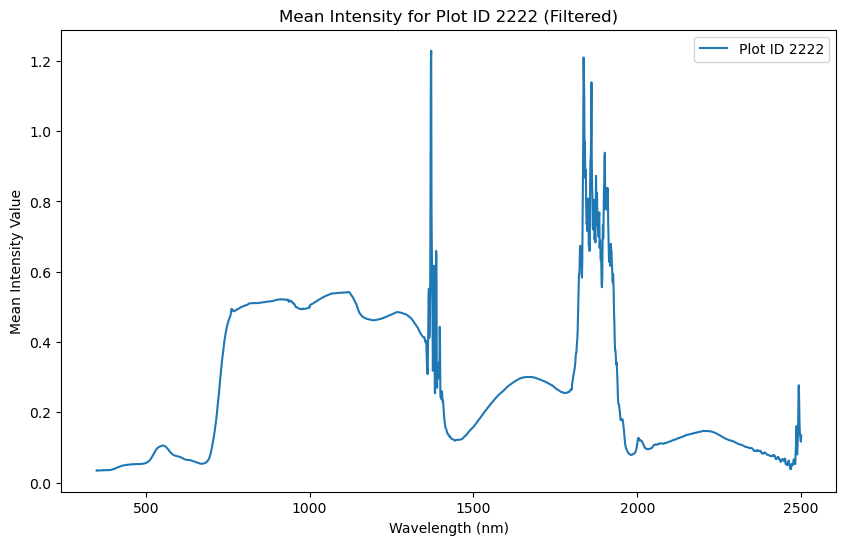

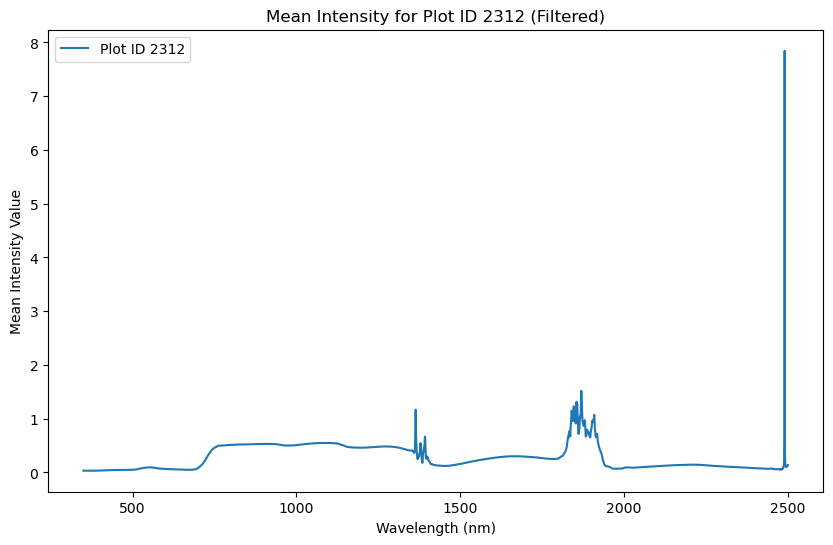

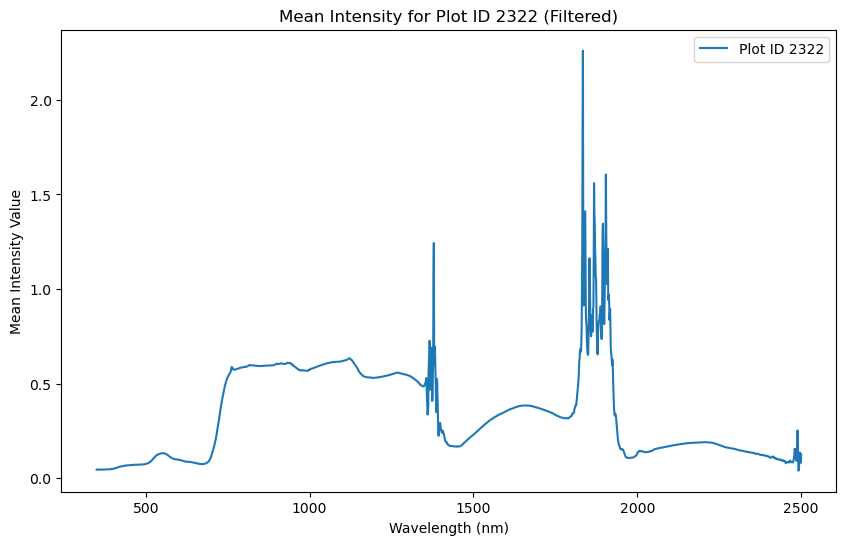

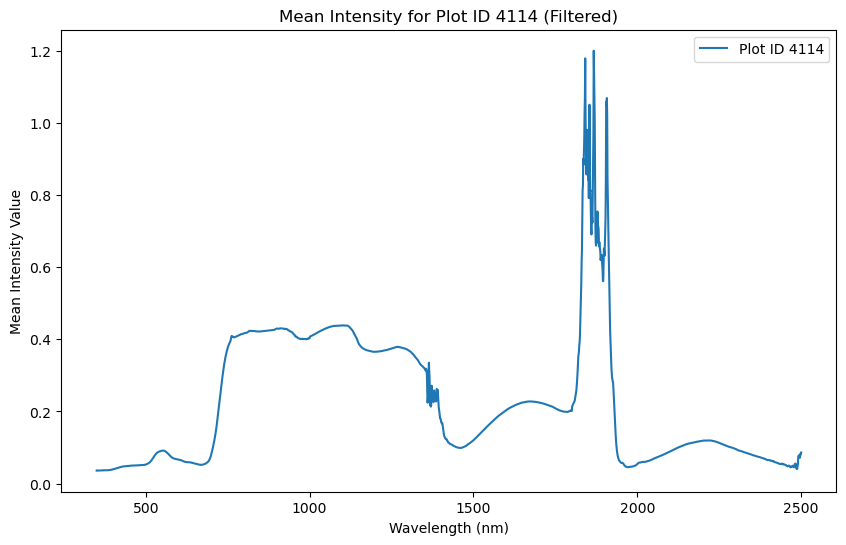

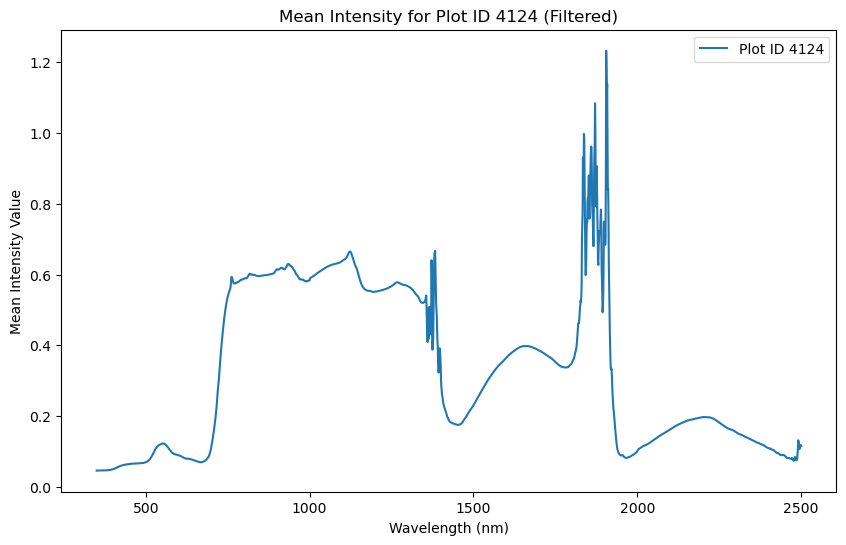

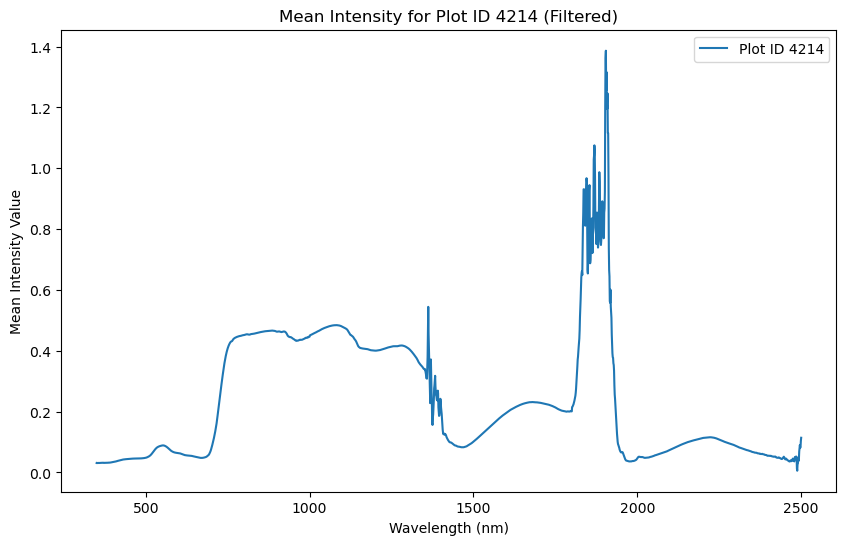

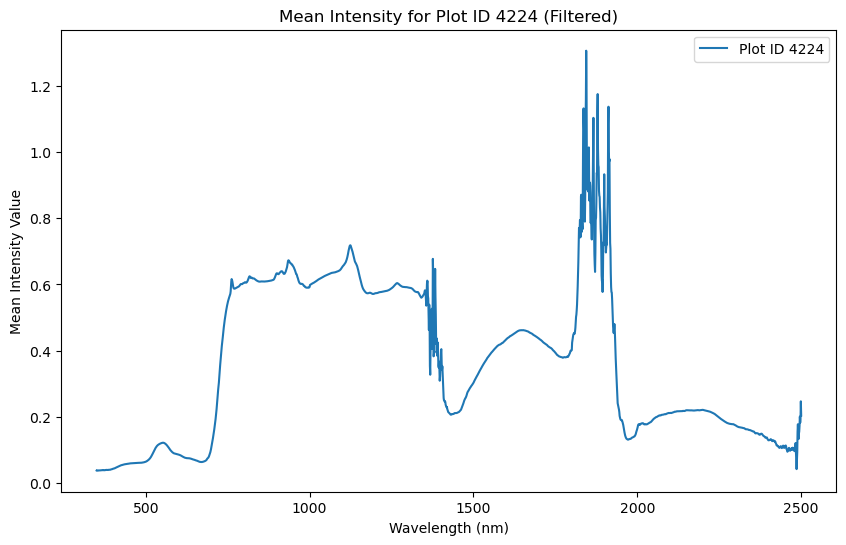

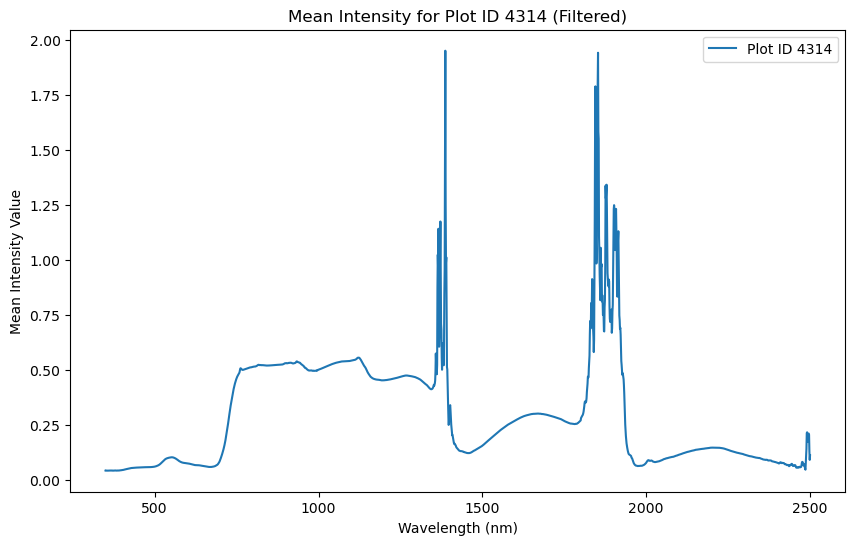

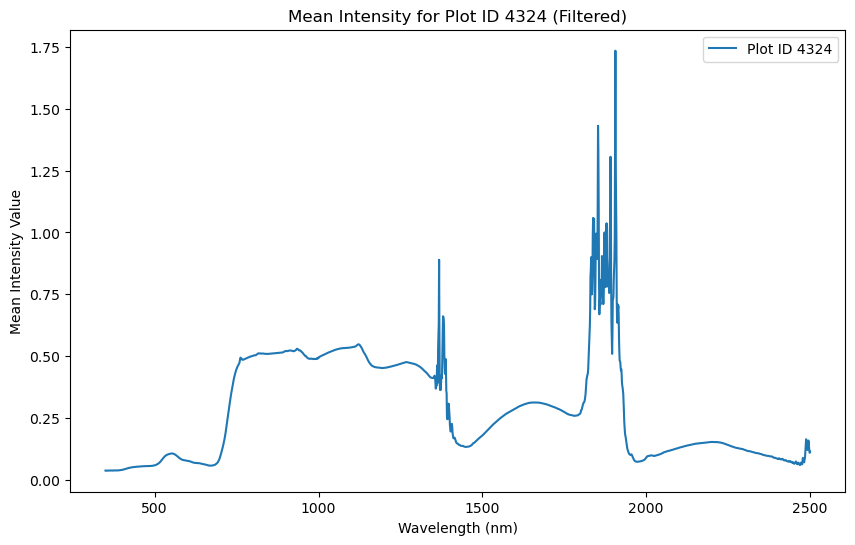

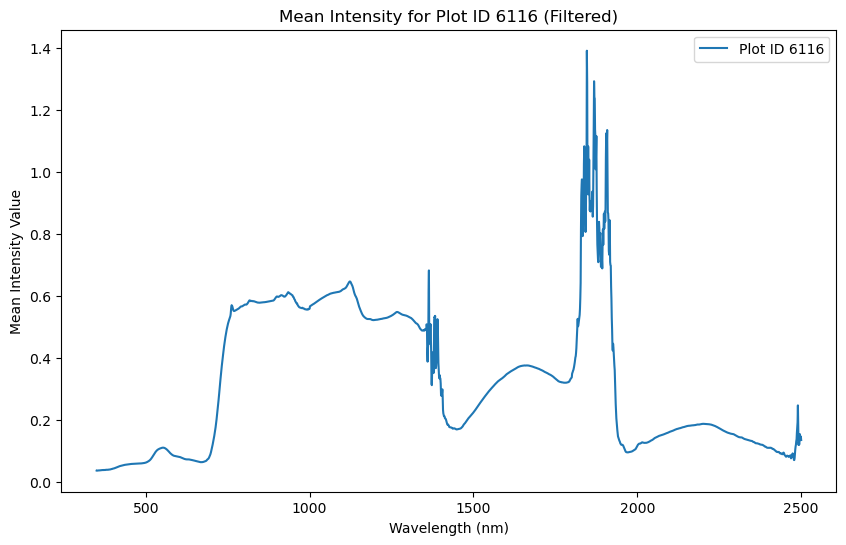

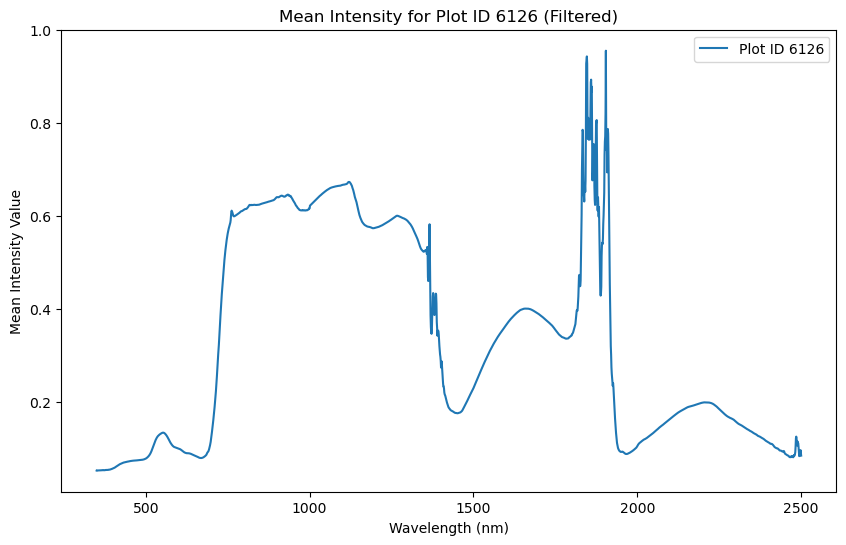

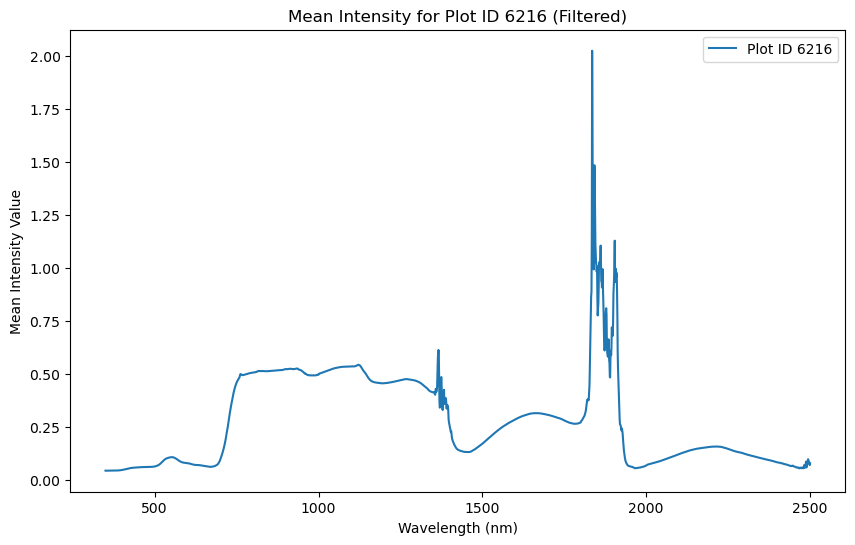

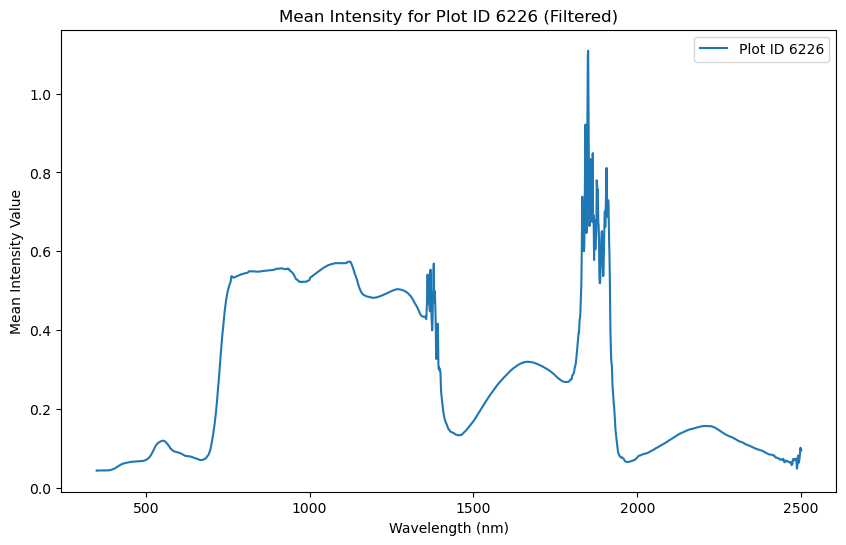

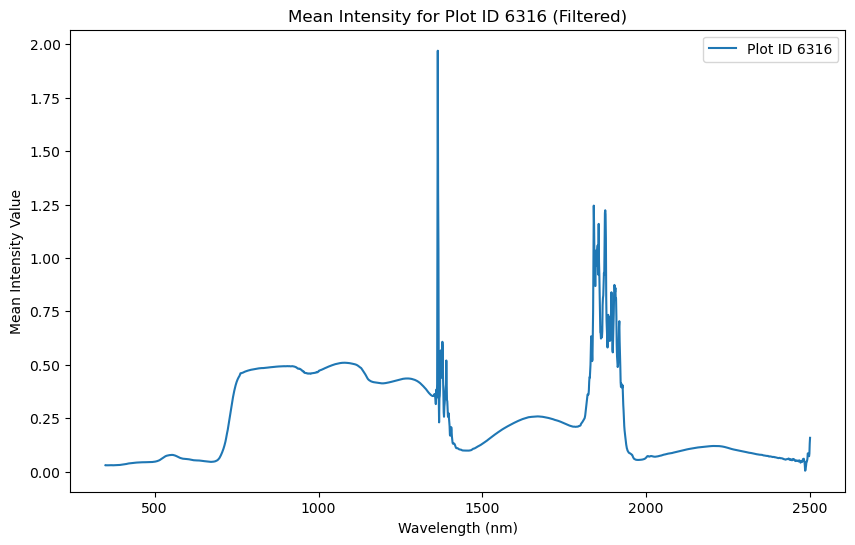

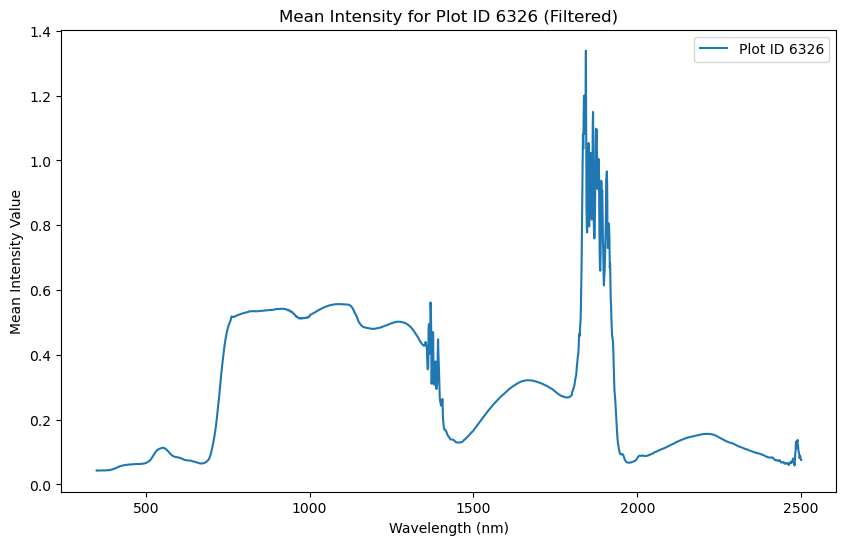

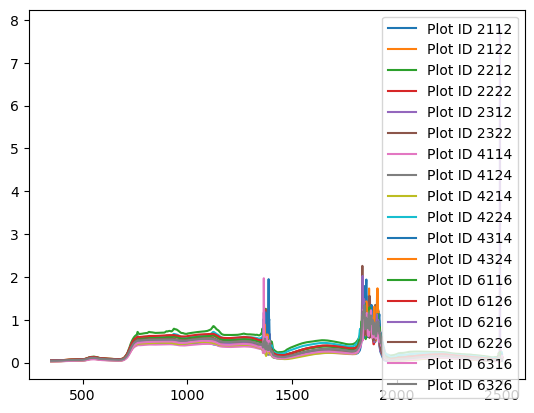

In [33]:
import matplotlib.pyplot as plt


# Assuming df has already been converted to numeric values where necessary

for plot_id, columns in filtered_plot_groups.items():
    # Check if there are any columns left after filtering
    if columns:
        # Calculate the mean across the columns for this plot ID
        mean_values = df[columns].mean(axis=1)

        # Create a new figure for each plot ID
        plt.figure(figsize=(10, 6))

        # Plot the mean values
        plt.plot(df['Wavelength'], mean_values, label=f'Plot ID {plot_id}')  # Use Wavelength for x-axis

        plt.xlabel('Wavelength (nm)')  # x-axis represents wavelength in nanometers
        plt.ylabel('Mean Intensity Value')
        plt.title(f'Mean Intensity for Plot ID {plot_id} (Filtered)')
        plt.legend()

        plt.show()

#plot all the  together with legend
for plot_id, columns in filtered_plot_groups.items():
    # Check if there are any columns left after filtering
    if columns:
        # Calculate the mean across the columns for this plot ID
        mean_values = df[columns].mean(axis=1)

        # Plot the mean values
        plt.plot(df['Wavelength'], mean_values, label=f'Plot ID {plot_id}')  # Use Wavelength for x-axis
        #add legend
        plt.legend()



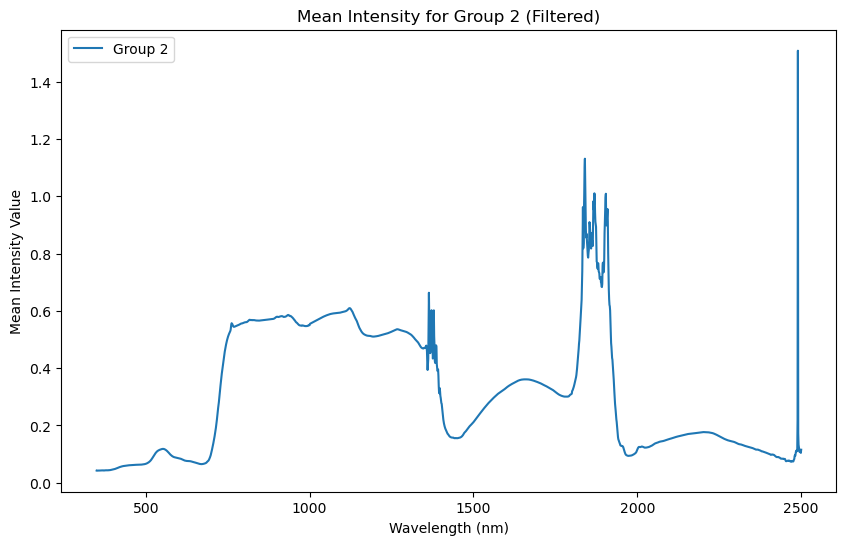

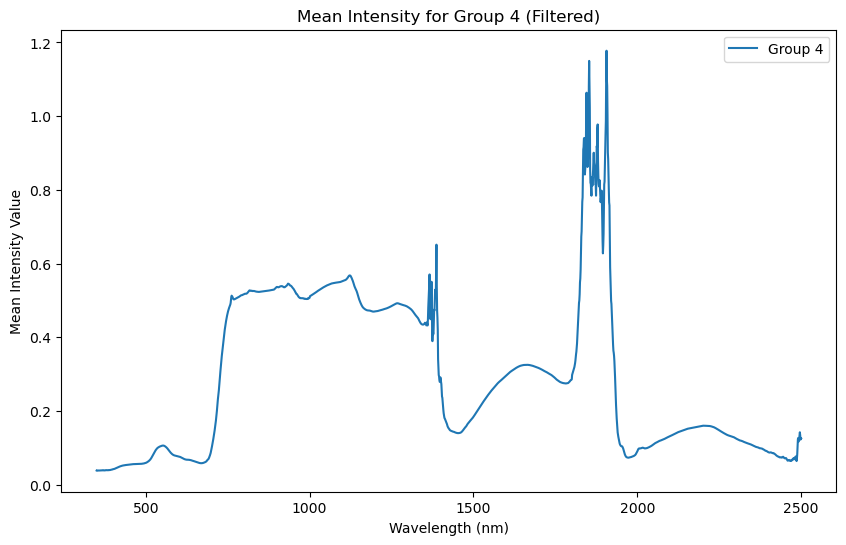

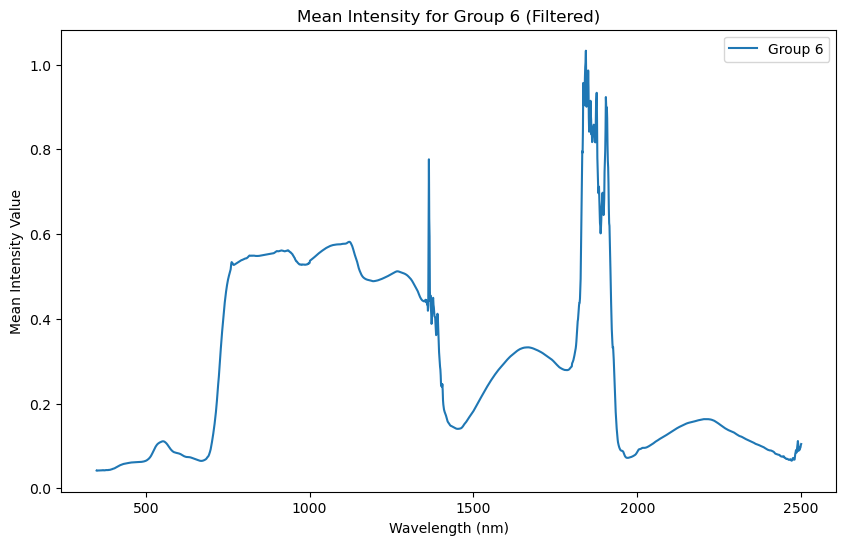

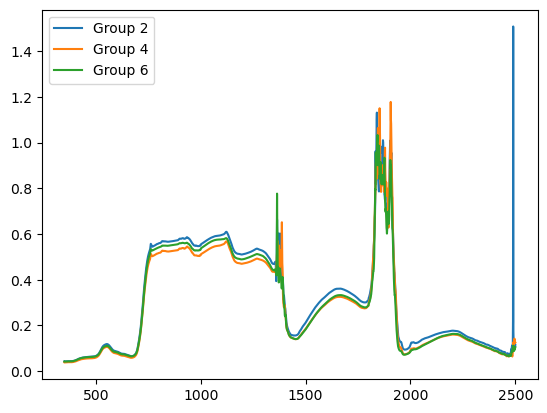

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize a new dictionary for the broader groups
broad_groupings = {}

# Populate the broad_groupings dictionary using the first two digits of the plot_id
for plot_id, columns in filtered_plot_groups.items():
    broad_id = plot_id[:1]  # Extract the first two digits for the broader grouping
    
    # Ensure we have the list initialized for each broad_id
    if broad_id not in broad_groupings:
        broad_groupings[broad_id] = []
    
    # Extend the list of columns for this broad_id with the filtered columns from the specific plot_id
    broad_groupings[broad_id].extend(columns)

# Now, calculate and plot the mean for each broad group
for broad_id, columns in broad_groupings.items():
    if columns:
        # Calculate the mean across the columns for this broad group
        mean_values = df[columns].mean(axis=1)

        # Create a new figure for each broad group
        plt.figure(figsize=(10, 6))

        # Plot the mean values using the Wavelength column for the x-axis
        plt.plot(df['Wavelength'], mean_values, label=f'Group {broad_id}')  

        plt.xlabel('Wavelength (nm)')  # x-axis represents wavelength in nanometers
        plt.ylabel('Mean Intensity Value')
        plt.title(f'Mean Intensity for Group {broad_id} (Filtered)')
        plt.legend()

        plt.show()

#plot all on same graph
for broad_id, columns in broad_groupings.items():
    if columns:
        # Calculate the mean across the columns for this broad group
        mean_values = df[columns].mean(axis=1)

        # Plot the mean values using the Wavelength column for the x-axis
        plt.plot(df['Wavelength'], mean_values, label=f'Group {broad_id}')
        #add legend
        plt.legend()

In [35]:
mean_values

0       0.041765
1       0.041347
2       0.041834
3       0.041775
4       0.041784
          ...   
2146    0.096464
2147    0.094652
2148    0.097191
2149    0.101796
2150    0.104367
Length: 2151, dtype: float64

In [36]:
#use the filtered_plot_groups and group_to_plot_number to list the plot numbers of the filtered groups


In [46]:
import re

# Update plot_treatment_map to reflect the correct treatment percentage for each plot number
plot_treatment_map = {
    '111': '100%', '112': '100%', '113': '100%', '114': '100%', '115': '100%', '116': '100%',
    '121': '70%', '122': '70%', '123': '70%', '124': '70%', '125': '70%', '126': '70%',
    '211': '100%', '212': '100%', '213': '100%', '214': '100%', '215': '100%', '216': '100%',
    '221': '70%', '222': '70%', '223': '70%', '224': '70%', '225': '70%', '226': '70%',
    '311': '100%', '312': '100%', '313': '100%', '314': '100%', '315': '100%', '316': '100%',
    '321': '70%', '322': '70%', '323': '70%', '324': '70%', '325': '70%', '326': '70%'
}

# Function to extract plot number from column name and determine treatment percentage
def get_treatment_from_column(column_name):
    # Extract the plot number from the column name
    plot_number_match = re.search(r"N(\d{3})\dP", column_name)
    if plot_number_match:
        plot_number = plot_number_match.group(1)
        # Return the treatment percentage from the map
        return plot_treatment_map.get(plot_number, 'Unknown')  # Default to 'Unknown' if plot number not found

#get column names
column_names = df.columns

# Apply the function to the column names and store the results
column_treatments = {col: get_treatment_from_column(col) for col in column_names}

#remove first entry in the dictionary
column_treatments.pop('Wavelength', None)

# Print the treatment for each column
print(column_treatments)


{'N2112P100000.asd': '100%', 'N2112P100001.asd': '100%', 'N2112P100002.asd': '100%', 'N2112P100003.asd': '100%', 'N2112P100004.asd': '100%', 'N2112P100005.asd': '100%', 'N2112P100006.asd': '100%', 'N2112P100007.asd': '100%', 'N2112P100008.asd': '100%', 'N2112P100009.asd': '100%', 'N2112P100010.asd': '100%', 'N2112P100011.asd': '100%', 'N2112P100012.asd': '100%', 'N2112P100013.asd': '100%', 'N2112P100014.asd': '100%', 'N2112P100015.asd': '100%', 'N2112P100016.asd': '100%', 'N2112P100017.asd': '100%', 'N2112P100018.asd': '100%', 'N2112P100019.asd': '100%', 'N2112P100020.asd': '100%', 'N2112P100021.asd': '100%', 'N2112P100022.asd': '100%', 'N2112P100023.asd': '100%', 'N2112P100024.asd': '100%', 'N2112P100025.asd': '100%', 'N2112P100026.asd': '100%', 'N2112P100027.asd': '100%', 'N2112P100028.asd': '100%', 'N2112P100029.asd': '100%', 'N2112P200000.asd': '100%', 'N2112P200001.asd': '100%', 'N2112P200002.asd': '100%', 'N2112P200003.asd': '100%', 'N2112P200004.asd': '100%', 'N2112P200005.asd':

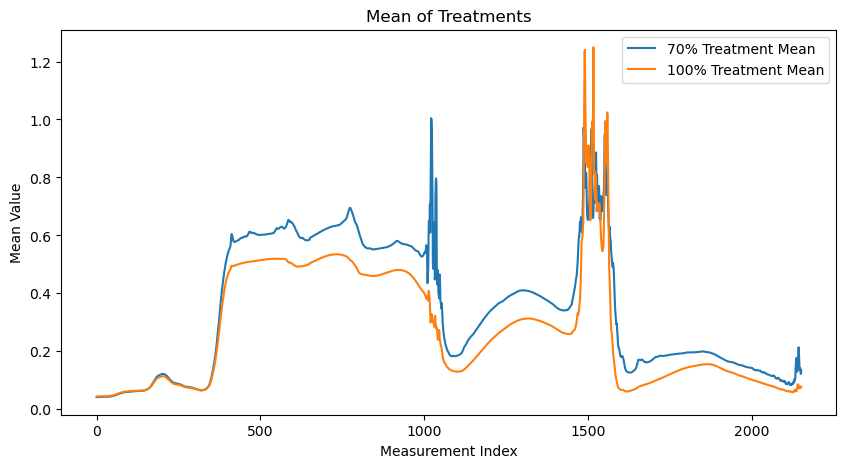

In [47]:
import matplotlib.pyplot as plt

# Use the plot_treatment_map from the previous code snippet

# Function to extract plot number from column name and determine treatment percentage
def get_treatment_from_column(column_name):
    # Extract the plot number from the column name
    plot_number_match = re.search(r"N(\d{3})\dP", column_name)
    if plot_number_match:
        plot_number = plot_number_match.group(1)
        # Return the treatment percentage from the map
        return plot_treatment_map.get(plot_number, 'Unknown')  # Default to 'Unknown' if plot number not found

# Apply the function to the DataFrame's columns to determine the treatment for each column
df_treatments = {col: get_treatment_from_column(col) for col in df.columns if 'P' in col}

# Create two DataFrames to hold the values for 70% and 100% treatments
df_70 = df[[col for col in df.columns if df_treatments.get(col) == '70%']]
df_100 = df[[col for col in df.columns if df_treatments.get(col) == '100%']]

# Calculate the mean for each treatment across all columns (plots)
mean_70 = df_70.mean(axis=1)
mean_100 = df_100.mean(axis=1)

# Plot the means for 70% and 100% treatments
plt.figure(figsize=(10, 5))
plt.plot(mean_70.index, mean_70.values, label='70% Treatment Mean')
plt.plot(mean_100.index, mean_100.values, label='100% Treatment Mean')
plt.legend()
plt.title('Mean of Treatments')
plt.xlabel('Measurement Index')
plt.ylabel('Mean Value')
plt.show()


In [39]:
#load harvest data
harvest = pd.read_excel('/Users/niks/Desktop/USDA/Spring 2024/Data/2021 NxWater Harvest data.xlsx')
# First, invert the 'group_to_plot_number' dictionary to map plot numbers to group codes
plot_to_group_number = {v: k for k, v in group_to_plot_number.items()}

# Now we can map the 'Plot' column in 'harvest' DataFrame to the group number
# using the 'plot_to_group_number' dictionary and create a new 'Group' column
harvest['Group'] = harvest['Plot'].map(plot_to_group_number)

# Check if the 'Plot' values in the DataFrame are the same type as the dictionary values.
# If they're not, you'll need to ensure they match. For example, if the dictionary has integers as keys,
# make sure 'Plot' column is also of integer type.

# Display the first few rows of the DataFrame to verify the new 'Group' column


#multiply Weight(g) 0% MC column from harvest with the mean_vi_values for each group
# Initialize a new dictionary to store the weighted VI values
vi_0per_grain_yield = {}
vi_15per_grain_yield = {}
vi_ET = {}
vi_WP = {}
# Iterate over the mean VI values for each group
for group_id, vi_values in mean_vi_values.items():
    # Multiply the VI values by the corresponding weight from the harvest data
    vi_0per_grain_yield[group_id] = vi_values * harvest.loc[harvest['Group'] == group_id, 'Grain Yield, 0% MC kg/ha'].values[0]
    vi_15per_grain_yield[group_id] = vi_values * harvest.loc[harvest['Group'] == group_id, 'Grain Yield, 15.5% MC kg/ha'].values[0]
    vi_ET[group_id] = vi_values * harvest.loc[harvest['Group'] == group_id, 'Annual ET, mm'].values[0]
    vi_WP[group_id] = vi_values * harvest.loc[harvest['Group'] == group_id, 'WP (kg/ha/mm)0MC'].values[0]


In [40]:
#VI * 0% moisture content grain yield
print(vi_0per_grain_yield)


{'2112': NDVI        6.242494e+03
EVI         5.768079e+03
RENDVI      4.699130e+03
MRENDVI     5.917278e+03
VREI1       1.443012e+04
VREI2      -1.492713e+03
PRI         7.145715e+01
SIPI        8.098359e+03
PSRI       -1.591758e+01
CRI1        5.336076e+04
CRI2        3.908285e+04
WBI         8.527716e+03
MCARI       1.388408e+02
MTVI        5.162285e+03
TCARI       1.527835e+03
GNDVI       5.093164e+03
NDCI1       4.902962e+03
NDCI2       5.140222e+03
REPI3       5.816181e+06
REPI4       5.823663e+06
REPI2       4.134286e+09
D720        6.812624e+01
EGFR        6.701356e+04
NDII        2.503926e+03
NDWI2130    5.286038e+03
NDWI2140    5.180125e+03
WI          8.527716e+03
SRWI1       9.101700e+03
MSI         3.848256e+03
SWISWI      2.565078e+03
dtype: float64, '2122': NDVI        3.160548e+03
EVI         3.533393e+03
RENDVI      2.387472e+03
MRENDVI     3.005788e+03
VREI1       7.339871e+03
VREI2      -7.481255e+02
PRI         7.344293e+00
SIPI        4.235428e+03
PSRI        2.114

In [41]:
#VI * 15% moisture grain yield
print(vi_15per_grain_yield)


{'2112': NDVI        7.387567e+03
EVI         6.826129e+03
RENDVI      5.561101e+03
MRENDVI     7.002696e+03
VREI1       1.707706e+04
VREI2      -1.766524e+03
PRI         8.456468e+01
SIPI        9.583856e+03
PSRI       -1.883737e+01
CRI1        6.314883e+04
CRI2        4.625190e+04
WBI         1.009197e+04
MCARI       1.643086e+02
MTVI        6.109213e+03
TCARI       1.808089e+03
GNDVI       6.027413e+03
NDCI1       5.802322e+03
NDCI2       6.083103e+03
REPI3       6.883054e+06
REPI4       6.891909e+06
REPI2       4.892646e+09
D720        8.062276e+01
EGFR        7.930599e+04
NDII        2.963226e+03
NDWI2130    6.255666e+03
NDWI2140    6.130325e+03
WI          1.009197e+04
SRWI1       1.077124e+04
MSI         4.554149e+03
SWISWI      3.035595e+03
dtype: float64, '2122': NDVI        3.740293e+03
EVI         4.181530e+03
RENDVI      2.825411e+03
MRENDVI     3.557145e+03
VREI1       8.686238e+03
VREI2      -8.853556e+02
PRI         8.691471e+00
SIPI        5.012341e+03
PSRI        2.502

In [42]:
#VI * ET
print(vi_ET)

{'2112': NDVI        4.045499e+02
EVI         3.738050e+02
RENDVI      3.045310e+02
MRENDVI     3.834740e+02
VREI1       9.351556e+02
VREI2      -9.673649e+01
PRI         4.630839e+00
SIPI        5.248208e+02
PSRI       -1.031552e+00
CRI1        3.458088e+03
CRI2        2.532796e+03
WBI         5.526456e+02
MCARI       8.997691e+00
MTVI        3.345461e+02
TCARI       9.901262e+01
GNDVI       3.300666e+02
NDCI1       3.177405e+02
NDCI2       3.331163e+02
REPI3       3.769224e+05
REPI4       3.774072e+05
REPI2       2.679258e+08
D720        4.414976e+00
EGFR        4.342868e+03
NDII        1.622690e+02
NDWI2130    3.425660e+02
NDWI2140    3.357022e+02
WI          5.526456e+02
SRWI1       5.898431e+02
MSI         2.493894e+02
SWISWI      1.662320e+02
dtype: float64, '2122': NDVI        2.778012e+02
EVI         3.105730e+02
RENDVI      2.098505e+02
MRENDVI     2.641983e+02
VREI1       6.451492e+02
VREI2      -6.575763e+01
PRI         6.455379e-01
SIPI        3.722795e+02
PSRI        1.858

In [43]:

root_data = pd.read_excel('/Users/niks/Desktop/USDA/Spring 2024/Data/2021 NxWater Plant Root weight and length.xlsx')

root_data['Group'] = root_data['Plot'].map(plot_to_group_number)
#multiple root weight and length with VI
vi_root_weight = {}
# Iterate over the mean VI values for each group
for group_id, vi_values in mean_vi_values.items():
    # Multiply the VI values by the corresponding weight from the harvest data
    vi_root_weight[group_id] = vi_values * root_data.loc[root_data['Group'] == group_id, 'mass_g'].values[0]

#VI * root weight
print(vi_root_weight)

#do the same for "depth" column
vi_root_depth = {}
# Iterate over the mean VI values for each group
for group_id, vi_values in mean_vi_values.items():
    # Multiply the VI values by the corresponding weight from the harvest data
    vi_root_depth[group_id] = root_data.loc[root_data['Group'] == group_id, 'Depth'].values[0]



{'2112': NDVI             0.297182
EVI              0.274597
RENDVI           0.223708
MRENDVI          0.281699
VREI1            0.686964
VREI2           -0.071062
PRI              0.003402
SIPI             0.385532
PSRI            -0.000758
CRI1             2.540306
CRI2             1.860588
WBI              0.405973
MCARI            0.006610
MTVI             0.245757
TCARI            0.072735
GNDVI            0.242466
NDCI1            0.233412
NDCI2            0.244707
REPI3          276.886562
REPI4          277.242755
REPI2       196817.855968
D720             0.003243
EGFR             3.190264
NDII             0.119203
NDWI2130         0.251648
NDWI2140         0.246606
WI               0.405973
SRWI1            0.433298
MSI              0.183201
SWISWI           0.122114
dtype: float64, '2122': NDVI             0.847346
EVI              0.947306
RENDVI           0.640084
MRENDVI          0.805855
VREI1            1.967827
VREI2           -0.200573
PRI              0.001969
SIPI 

In [44]:
root_data['Depth']

0        0
1       15
2       30
3       60
4       90
      ... 
499     30
500     60
501     90
502    120
503    150
Name: Depth, Length: 504, dtype: int64

In [45]:
#VI * root length
print(vi_root_length)

NameError: name 'vi_root_length' is not defined